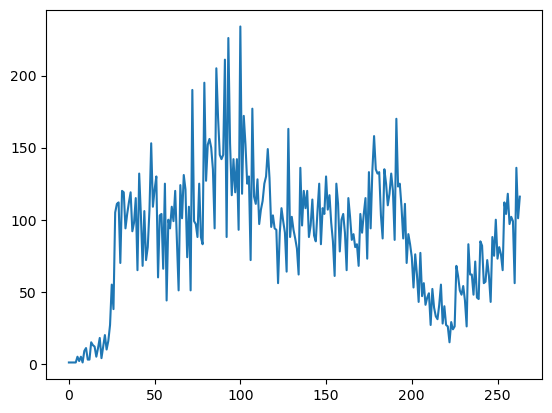

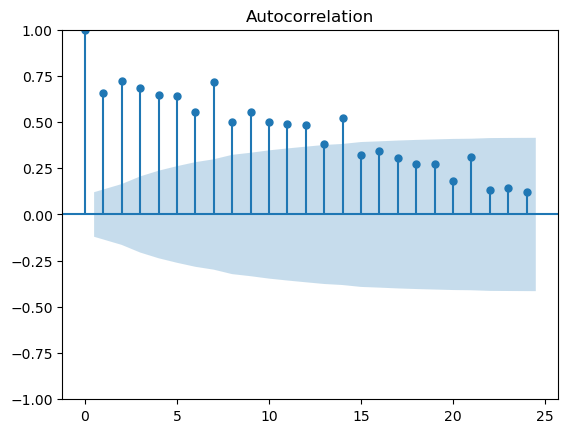

D:\88690\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


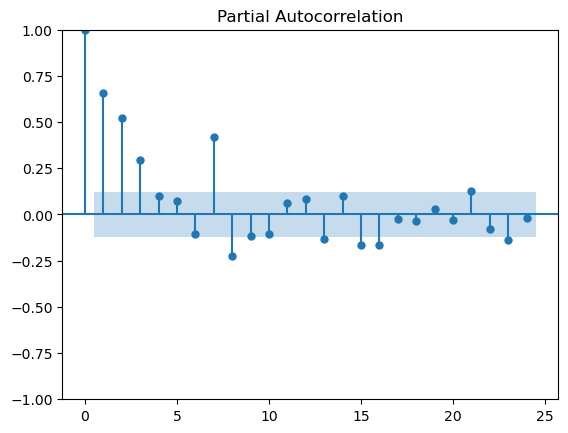

In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from tensorflow import keras
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from keras import optimizers
dataset = pandas.read_csv(r'各縣市每日確診資料\金門縣每日確診數.csv', usecols=[2], engine='python', skipfooter=3,encoding='utf-8')
plt.plot(dataset)
plt.savefig('Kinmen.png')
plt.show()

# 畫出 ACF 12 期的效應
sm.graphics.tsa.plot_acf(dataset, lags=24)
plt.savefig('Kinmen_acf_24.png')
plt.show()
# 畫出 PACF 12 期的效應
sm.graphics.tsa.plot_pacf(dataset, lags=24)
plt.savefig('Kinmen_pacf_24.png')
plt.show()

In [2]:
# 產生 (X, Y) 資料集, Y 是下一期的感染人數
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

# 載入訓練資料
dataframe = read_csv(r'各縣市每日確診資料\金門縣每日確診數.csv', usecols=[2], engine='python', skipfooter=0,encoding='utf-8')
dataframe=dataframe.drop(dataframe[dataframe['確定病例數']==0].index,axis=0)
print(dataframe)
#plt.plot(dataframe)

dataset = dataframe.values
print(len(dataset))
#dataset=np.delete(dataset,[0,768],axis=0)

# 正規化(normalize) 資料，使資料值介於[0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

     確定病例數
0        1
1        1
2        1
3        1
4        1
..     ...
260     56
261    136
262    101
263    116
264    107

[265 rows x 1 columns]
265


## GRU架構

### Model1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1, 64)             4224      
                                                                 
 dense (Dense)               (None, 1, 1)              65        
                                                                 
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5000
27/27 [==============================] - 1s 18ms/step - loss: 0.0872 - mse: 0.0872 - val_loss: 0.1434 - val_mse: 0.1434
Epoch 2/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0800 - mse: 0.0800 - val_loss: 0.1304 - val_mse: 0.1304
Epoch 3/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0736 - mse: 0.0736 - val_loss: 0.1183 - val_mse: 0.1183
Epoch 4/5000
27/27 [==============================] -

27/27 [==============================] - 0s 8ms/step - loss: 0.0459 - mse: 0.0459 - val_loss: 0.0359 - val_mse: 0.0359
Epoch 119/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0459 - mse: 0.0459 - val_loss: 0.0360 - val_mse: 0.0360
Epoch 120/5000
27/27 [==============================] - 0s 8ms/step - loss: 0.0459 - mse: 0.0459 - val_loss: 0.0358 - val_mse: 0.0358
Epoch 121/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0359 - val_mse: 0.0359
Epoch 122/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0459 - mse: 0.0459 - val_loss: 0.0359 - val_mse: 0.0359
Epoch 123/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0359 - val_mse: 0.0359
Epoch 124/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0360 - val_mse: 0.0360
Epoch 125/5000
27/27 [==============================] - 0s 6ms/step - loss: 0

27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0336 - val_mse: 0.0336
Epoch 241/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0336 - val_mse: 0.0336
Epoch 242/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0336 - val_mse: 0.0336
Epoch 243/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0335 - val_mse: 0.0335
Epoch 244/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0336 - val_mse: 0.0336
Epoch 245/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0334 - val_mse: 0.0334
Epoch 246/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0334 - val_mse: 0.0334
Epoch 247/5000
27/27 [==============================] - 0s 6ms/step - loss: 0

27/27 [==============================] - 0s 6ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0322 - val_mse: 0.0322
Epoch 363/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0322 - val_mse: 0.0322
Epoch 364/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0320 - val_mse: 0.0320
Epoch 365/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0321 - val_mse: 0.0321
Epoch 366/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0322 - val_mse: 0.0322
Epoch 367/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0321 - val_mse: 0.0321
Epoch 368/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0322 - val_mse: 0.0322
Epoch 369/5000
27/27 [==============================] - 0s 5ms/step - loss: 0

27/27 [==============================] - 0s 5ms/step - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0311 - val_mse: 0.0311
Epoch 485/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0311 - val_mse: 0.0311
Epoch 486/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0311 - val_mse: 0.0311
Epoch 487/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0311 - val_mse: 0.0311
Epoch 488/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0312 - val_mse: 0.0312
Epoch 489/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0310 - val_mse: 0.0310
Epoch 490/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0311 - val_mse: 0.0311
Epoch 491/5000
27/27 [==============================] - 0s 5ms/step - loss: 0

27/27 [==============================] - 0s 8ms/step - loss: 0.0452 - mse: 0.0452 - val_loss: 0.0305 - val_mse: 0.0305
Epoch 607/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0307 - val_mse: 0.0307
Epoch 608/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 609/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 610/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0307 - val_mse: 0.0307
Epoch 611/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0307 - val_mse: 0.0307
Epoch 612/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0305 - val_mse: 0.0305
Epoch 613/5000
27/27 [==============================] - 0s 5ms/step - loss: 0

27/27 [==============================] - 0s 5ms/step - loss: 0.0452 - mse: 0.0452 - val_loss: 0.0302 - val_mse: 0.0302
Epoch 729/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0450 - mse: 0.0450 - val_loss: 0.0302 - val_mse: 0.0302
Epoch 730/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0302 - val_mse: 0.0302
Epoch 731/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0302 - val_mse: 0.0302
Epoch 732/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0303 - val_mse: 0.0303
Epoch 733/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0303 - val_mse: 0.0303
Epoch 734/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0302 - val_mse: 0.0302
Epoch 735/5000
27/27 [==============================] - 0s 5ms/step - loss: 0

27/27 [==============================] - 0s 7ms/step - loss: 0.0452 - mse: 0.0452 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 851/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 852/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 853/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 854/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 855/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 856/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 857/5000
27/27 [==============================] - 0s 6ms/step - loss: 0

27/27 [==============================] - 0s 5ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 973/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 974/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 975/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 976/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 977/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 978/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 979/5000
27/27 [==============================] - 0s 5ms/step - loss: 0

27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 1034/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 1035/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 1036/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 1037/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 1038/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 1039/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 1040/5000
27/27 [==============================] - 0s 6ms/step - 

Epoch 1094/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 1095/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 1096/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 1097/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 1098/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 1099/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 1100/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 1101/5000
27/27 [==============================] 

Epoch 1215/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 1216/5000
27/27 [==============================] - 0s 11ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 1217/5000
27/27 [==============================] - 0s 8ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 1218/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 1219/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 1220/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 1221/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 1222/5000
27/27 [==============================]

Epoch 1336/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 1337/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 1338/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 1339/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 1340/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0459 - mse: 0.0459 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 1341/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 1342/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 1343/5000
27/27 [==============================] 

Epoch 1457/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 1458/5000
27/27 [==============================] - 0s 10ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 1459/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 1460/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 1461/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 1462/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 1463/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0460 - mse: 0.0460 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 1464/5000
27/27 [==============================]

Epoch 1578/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 1579/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 1580/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 1581/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 1582/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 1583/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 1584/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 1585/5000
27/27 [==============================] 

Epoch 1699/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 1700/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 1701/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 1702/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 1703/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 1704/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0452 - mse: 0.0452 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 1705/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 1706/5000
27/27 [==============================] 

Epoch 1820/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 1821/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 1822/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 1823/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 1824/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 1825/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 1826/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 1827/5000
27/27 [==============================] 

Epoch 1941/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 1942/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 1943/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 1944/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 1945/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0452 - mse: 0.0452 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 1946/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 1947/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 1948/5000
27/27 [==============================] 

Epoch 2062/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 2063/5000
27/27 [==============================] - 0s 4ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 2064/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 2065/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 2066/5000
27/27 [==============================] - 0s 4ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 2067/5000
27/27 [==============================] - 0s 4ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 2068/5000
27/27 [==============================] - 0s 4ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 2069/5000
27/27 [==============================] 

Epoch 2183/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 2184/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 2185/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0450 - mse: 0.0450 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 2186/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 2187/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 2188/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 2189/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 2190/5000
27/27 [==============================] 

Epoch 2304/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 2305/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 2306/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 2307/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 2308/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 2309/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 2310/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 2311/5000
27/27 [==============================] 

Epoch 2425/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 2426/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0459 - mse: 0.0459 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 2427/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 2428/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 2429/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0296 - val_mse: 0.0296
Epoch 2430/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0451 - mse: 0.0451 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 2431/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 2432/5000
27/27 [==============================] 

Epoch 2546/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 2547/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 2548/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0452 - mse: 0.0452 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 2549/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 2550/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0451 - mse: 0.0451 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 2551/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 2552/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 2553/5000
27/27 [==============================] 

Epoch 2667/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0296 - val_mse: 0.0296
Epoch 2668/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0296 - val_mse: 0.0296
Epoch 2669/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 2670/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0452 - mse: 0.0452 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 2671/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 2672/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0296 - val_mse: 0.0296
Epoch 2673/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0452 - mse: 0.0452 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 2674/5000
27/27 [==============================] 

Epoch 2788/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0296 - val_mse: 0.0296
Epoch 2789/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0459 - mse: 0.0459 - val_loss: 0.0296 - val_mse: 0.0296
Epoch 2790/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 2791/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 2792/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 2793/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 2794/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0296 - val_mse: 0.0296
Epoch 2795/5000
27/27 [==============================] 

Epoch 2909/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 2910/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0451 - mse: 0.0451 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 2911/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 2912/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 2913/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0452 - mse: 0.0452 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 2914/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 2915/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 2916/5000
27/27 [==============================] 

Epoch 3030/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 3031/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 3032/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 3033/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 3034/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 3035/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0450 - mse: 0.0450 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 3036/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 3037/5000
27/27 [==============================] 

Epoch 3151/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 3152/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 3153/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 3154/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 3155/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 3156/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0459 - mse: 0.0459 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 3157/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0452 - mse: 0.0452 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 3158/5000
27/27 [==============================] 

Epoch 3272/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 3273/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 3274/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 3275/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 3276/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 3277/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 3278/5000
27/27 [==============================] - 0s 9ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 3279/5000
27/27 [==============================] 

Epoch 3393/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 3394/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 3395/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 3396/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 3397/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0452 - mse: 0.0452 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 3398/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 3399/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 3400/5000
27/27 [==============================] 

Epoch 3514/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 3515/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0452 - mse: 0.0452 - val_loss: 0.0296 - val_mse: 0.0296
Epoch 3516/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 3517/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 3518/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 3519/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 3520/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 3521/5000
27/27 [==============================] 

Epoch 3635/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 3636/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 3637/5000
27/27 [==============================] - 0s 4ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 3638/5000
27/27 [==============================] - 0s 4ms/step - loss: 0.0452 - mse: 0.0452 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 3639/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 3640/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0296 - val_mse: 0.0296
Epoch 3641/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 3642/5000
27/27 [==============================] 

Epoch 3756/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0452 - mse: 0.0452 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 3757/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 3758/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 3759/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 3760/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 3761/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 3762/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 3763/5000
27/27 [==============================] 

Epoch 3877/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 3878/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 3879/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 3880/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0452 - mse: 0.0452 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 3881/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 3882/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 3883/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 3884/5000
27/27 [==============================] 

Epoch 3998/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 3999/5000
27/27 [==============================] - 0s 4ms/step - loss: 0.0448 - mse: 0.0448 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 4000/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0452 - mse: 0.0452 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 4001/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 4002/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 4003/5000
27/27 [==============================] - 0s 4ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 4004/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 4005/5000
27/27 [==============================] 

Epoch 4119/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 4120/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 4121/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 4122/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 4123/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 4124/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 4125/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 4126/5000
27/27 [==============================] 

Epoch 4240/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 4241/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 4242/5000
27/27 [==============================] - 0s 4ms/step - loss: 0.0452 - mse: 0.0452 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 4243/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 4244/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 4245/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 4246/5000
27/27 [==============================] - 0s 4ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 4247/5000
27/27 [==============================] 

Epoch 4361/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 4362/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 4363/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 4364/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 4365/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0452 - mse: 0.0452 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 4366/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 4367/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 4368/5000
27/27 [==============================] 

Epoch 4482/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 4483/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 4484/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 4485/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 4486/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 4487/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 4488/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 4489/5000
27/27 [==============================] 

Epoch 4603/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 4604/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0296 - val_mse: 0.0296
Epoch 4605/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 4606/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0296 - val_mse: 0.0296
Epoch 4607/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 4608/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 4609/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0452 - mse: 0.0452 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 4610/5000
27/27 [==============================] 

Epoch 4724/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 4725/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0296 - val_mse: 0.0296
Epoch 4726/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 4727/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0296 - val_mse: 0.0296
Epoch 4728/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0460 - mse: 0.0460 - val_loss: 0.0296 - val_mse: 0.0296
Epoch 4729/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0296 - val_mse: 0.0296
Epoch 4730/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0452 - mse: 0.0452 - val_loss: 0.0296 - val_mse: 0.0296
Epoch 4731/5000
27/27 [==============================] 

Epoch 4845/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 4846/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0296 - val_mse: 0.0296
Epoch 4847/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 4848/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 4849/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 4850/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0296 - val_mse: 0.0296
Epoch 4851/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0296 - val_mse: 0.0296
Epoch 4852/5000
27/27 [==============================] 

Epoch 4966/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 4967/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0296 - val_mse: 0.0296
Epoch 4968/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 4969/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 4970/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0296 - val_mse: 0.0296
Epoch 4971/5000
27/27 [==============================] - 0s 4ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 4972/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0296 - val_mse: 0.0296
Epoch 4973/5000
27/27 [==============================] 

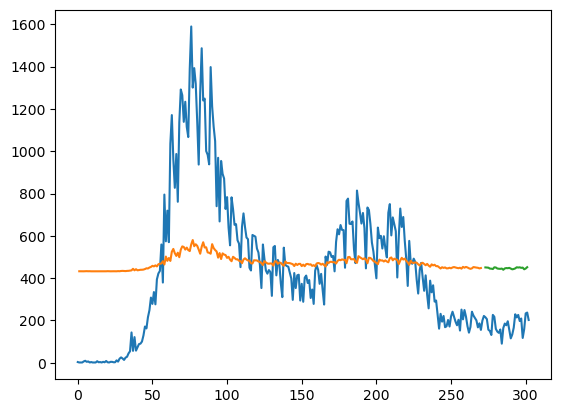

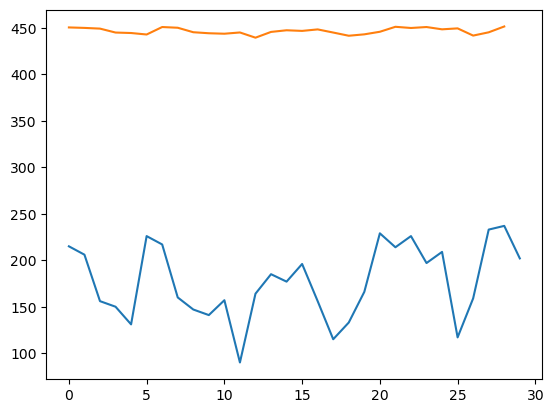

In [3]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    Dense(1, activation='sigmoid')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="hualien_gru_5000_1.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=5000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('hualien_gru_5000_1.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict=trainPredict.reshape(-1, 1)
testPredict=testPredict.reshape(-1, 1)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('hualien_gru_5000_plot_1.png') 
plt.show()

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("hualien_gru_5000_predict&real_1.png")
plt.show()

### Model2

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1, 128)            50304     
                                                                 
 dense_1 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5000
27/27 [==============================] - 3s 29ms/step - loss: 0.0861 - mse: 0.0861 - val_loss: 0.1468 - val_mse: 0.1468
Epoch 2/5000
27/27 [==============================] - 0s 10ms/step - loss: 0.0823 - mse: 0.0823 - val_loss: 0.1393 - val_mse: 0.1393
Epoch 3/5000
27/27 [==============================] - 0s 8ms/step - loss: 0.0785 - mse: 0.0785 - val_loss: 0.1318 - val_mse: 0.1318
Epoch 4/5000
27/27 [============================

27/27 [==============================] - 0s 9ms/step - loss: 0.0460 - mse: 0.0460 - val_loss: 0.0367 - val_mse: 0.0367
Epoch 119/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0459 - mse: 0.0459 - val_loss: 0.0367 - val_mse: 0.0367
Epoch 120/5000
27/27 [==============================] - 0s 10ms/step - loss: 0.0460 - mse: 0.0460 - val_loss: 0.0366 - val_mse: 0.0366
Epoch 121/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0460 - mse: 0.0460 - val_loss: 0.0367 - val_mse: 0.0367
Epoch 122/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0460 - mse: 0.0460 - val_loss: 0.0367 - val_mse: 0.0367
Epoch 123/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0460 - mse: 0.0460 - val_loss: 0.0367 - val_mse: 0.0367
Epoch 124/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0460 - mse: 0.0460 - val_loss: 0.0367 - val_mse: 0.0367
Epoch 125/5000
27/27 [==============================] - 0s 6ms/step - loss: 

27/27 [==============================] - 0s 7ms/step - loss: 0.0459 - mse: 0.0459 - val_loss: 0.0359 - val_mse: 0.0359
Epoch 241/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0459 - mse: 0.0459 - val_loss: 0.0359 - val_mse: 0.0359
Epoch 242/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0459 - mse: 0.0459 - val_loss: 0.0359 - val_mse: 0.0359
Epoch 243/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0459 - mse: 0.0459 - val_loss: 0.0358 - val_mse: 0.0358
Epoch 244/5000
27/27 [==============================] - 0s 8ms/step - loss: 0.0459 - mse: 0.0459 - val_loss: 0.0359 - val_mse: 0.0359
Epoch 245/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0459 - mse: 0.0459 - val_loss: 0.0358 - val_mse: 0.0358
Epoch 246/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0459 - mse: 0.0459 - val_loss: 0.0358 - val_mse: 0.0358
Epoch 247/5000
27/27 [==============================] - 0s 6ms/step - loss: 0

27/27 [==============================] - 0s 8ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0354 - val_mse: 0.0354
Epoch 363/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0354 - val_mse: 0.0354
Epoch 364/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0459 - mse: 0.0459 - val_loss: 0.0353 - val_mse: 0.0353
Epoch 365/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0354 - val_mse: 0.0354
Epoch 366/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0354 - val_mse: 0.0354
Epoch 367/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0354 - val_mse: 0.0354
Epoch 368/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0354 - val_mse: 0.0354
Epoch 369/5000
27/27 [==============================] - 0s 6ms/step - loss: 0

27/27 [==============================] - 0s 7ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0349 - val_mse: 0.0349
Epoch 485/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0349 - val_mse: 0.0349
Epoch 486/5000
27/27 [==============================] - 0s 8ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0349 - val_mse: 0.0349
Epoch 487/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0349 - val_mse: 0.0349
Epoch 488/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0349 - val_mse: 0.0349
Epoch 489/5000
27/27 [==============================] - 0s 8ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0349 - val_mse: 0.0349
Epoch 490/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0349 - val_mse: 0.0349
Epoch 491/5000
27/27 [==============================] - 0s 7ms/step - loss: 0

27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 607/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0346 - val_mse: 0.0346
Epoch 608/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 609/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 610/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 611/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 612/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 613/5000
27/27 [==============================] - 0s 5ms/step - loss: 0

27/27 [==============================] - 0s 8ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0341 - val_mse: 0.0341
Epoch 729/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0341 - val_mse: 0.0341
Epoch 730/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0341 - val_mse: 0.0341
Epoch 731/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0341 - val_mse: 0.0341
Epoch 732/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0341 - val_mse: 0.0341
Epoch 733/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0341 - val_mse: 0.0341
Epoch 734/5000
27/27 [==============================] - 0s 8ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0341 - val_mse: 0.0341
Epoch 735/5000
27/27 [==============================] - 0s 7ms/step - loss: 0

27/27 [==============================] - 0s 11ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0336 - val_mse: 0.0336
Epoch 851/5000
27/27 [==============================] - 0s 8ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0337 - val_mse: 0.0337
Epoch 852/5000
27/27 [==============================] - 0s 8ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0337 - val_mse: 0.0337
Epoch 853/5000
27/27 [==============================] - 0s 10ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0336 - val_mse: 0.0336
Epoch 854/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0337 - val_mse: 0.0337
Epoch 855/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0337 - val_mse: 0.0337
Epoch 856/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0337 - val_mse: 0.0337
Epoch 857/5000
27/27 [==============================] - 0s 7ms/step - loss:

27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0334 - val_mse: 0.0334
Epoch 973/5000
27/27 [==============================] - 0s 10ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0334 - val_mse: 0.0334
Epoch 974/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0335 - val_mse: 0.0335
Epoch 975/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0334 - val_mse: 0.0334
Epoch 976/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0334 - val_mse: 0.0334
Epoch 977/5000
27/27 [==============================] - 0s 8ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0333 - val_mse: 0.0333
Epoch 978/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0333 - val_mse: 0.0333
Epoch 979/5000
27/27 [==============================] - 0s 6ms/step - loss: 

Epoch 1033/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0333 - val_mse: 0.0333
Epoch 1034/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0332 - val_mse: 0.0332
Epoch 1035/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0332 - val_mse: 0.0332
Epoch 1036/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0332 - val_mse: 0.0332
Epoch 1037/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0332 - val_mse: 0.0332
Epoch 1038/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0333 - val_mse: 0.0333
Epoch 1039/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0332 - val_mse: 0.0332
Epoch 1040/5000
27/27 [==============================] 

Epoch 1154/5000
27/27 [==============================] - 0s 8ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0329 - val_mse: 0.0329
Epoch 1155/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0330 - val_mse: 0.0330
Epoch 1156/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0329 - val_mse: 0.0329
Epoch 1157/5000
27/27 [==============================] - 0s 8ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0329 - val_mse: 0.0329
Epoch 1158/5000
27/27 [==============================] - 0s 10ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0329 - val_mse: 0.0329
Epoch 1159/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0329 - val_mse: 0.0329
Epoch 1160/5000
27/27 [==============================] - 0s 8ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0329 - val_mse: 0.0329
Epoch 1161/5000
27/27 [==============================]

Epoch 1275/5000
27/27 [==============================] - 0s 8ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0327 - val_mse: 0.0327
Epoch 1276/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0327 - val_mse: 0.0327
Epoch 1277/5000
27/27 [==============================] - 0s 9ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0326 - val_mse: 0.0326
Epoch 1278/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0327 - val_mse: 0.0327
Epoch 1279/5000
27/27 [==============================] - 0s 8ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0327 - val_mse: 0.0327
Epoch 1280/5000
27/27 [==============================] - 0s 8ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0326 - val_mse: 0.0326
Epoch 1281/5000
27/27 [==============================] - 0s 9ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0326 - val_mse: 0.0326
Epoch 1282/5000
27/27 [==============================] 

Epoch 1396/5000
27/27 [==============================] - 0s 8ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0325 - val_mse: 0.0325
Epoch 1397/5000
27/27 [==============================] - 0s 8ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0324 - val_mse: 0.0324
Epoch 1398/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0324 - val_mse: 0.0324
Epoch 1399/5000
27/27 [==============================] - 0s 8ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0324 - val_mse: 0.0324
Epoch 1400/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0325 - val_mse: 0.0325
Epoch 1401/5000
27/27 [==============================] - 0s 9ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0325 - val_mse: 0.0325
Epoch 1402/5000
27/27 [==============================] - 0s 8ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0323 - val_mse: 0.0323
Epoch 1403/5000
27/27 [==============================] 

Epoch 1517/5000
27/27 [==============================] - 0s 8ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0323 - val_mse: 0.0323
Epoch 1518/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0322 - val_mse: 0.0322
Epoch 1519/5000
27/27 [==============================] - 0s 8ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0323 - val_mse: 0.0323
Epoch 1520/5000
27/27 [==============================] - 0s 8ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0322 - val_mse: 0.0322
Epoch 1521/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0323 - val_mse: 0.0323
Epoch 1522/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0322 - val_mse: 0.0322
Epoch 1523/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0323 - val_mse: 0.0323
Epoch 1524/5000
27/27 [==============================] 

Epoch 1638/5000
27/27 [==============================] - 0s 8ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0320 - val_mse: 0.0320
Epoch 1639/5000
27/27 [==============================] - 0s 8ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0320 - val_mse: 0.0320
Epoch 1640/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0320 - val_mse: 0.0320
Epoch 1641/5000
27/27 [==============================] - 0s 8ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0320 - val_mse: 0.0320
Epoch 1642/5000
27/27 [==============================] - 0s 8ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0320 - val_mse: 0.0320
Epoch 1643/5000
27/27 [==============================] - 0s 9ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0319 - val_mse: 0.0319
Epoch 1644/5000
27/27 [==============================] - 0s 8ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0320 - val_mse: 0.0320
Epoch 1645/5000
27/27 [==============================] 

Epoch 1759/5000
27/27 [==============================] - 0s 9ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0318 - val_mse: 0.0318
Epoch 1760/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0318 - val_mse: 0.0318
Epoch 1761/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0318 - val_mse: 0.0318
Epoch 1762/5000
27/27 [==============================] - 0s 8ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0318 - val_mse: 0.0318
Epoch 1763/5000
27/27 [==============================] - 0s 8ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0318 - val_mse: 0.0318
Epoch 1764/5000
27/27 [==============================] - 0s 9ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0318 - val_mse: 0.0318
Epoch 1765/5000
27/27 [==============================] - 0s 8ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0318 - val_mse: 0.0318
Epoch 1766/5000
27/27 [==============================] 

Epoch 1880/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0317 - val_mse: 0.0317
Epoch 1881/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0317 - val_mse: 0.0317
Epoch 1882/5000
27/27 [==============================] - 0s 10ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0317 - val_mse: 0.0317
Epoch 1883/5000
27/27 [==============================] - 0s 8ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0316 - val_mse: 0.0316
Epoch 1884/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0317 - val_mse: 0.0317
Epoch 1885/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0316 - val_mse: 0.0316
Epoch 1886/5000
27/27 [==============================] - 0s 12ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0317 - val_mse: 0.0317
Epoch 1887/5000
27/27 [==============================

Epoch 2001/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0315 - val_mse: 0.0315
Epoch 2002/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0315 - val_mse: 0.0315
Epoch 2003/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0315 - val_mse: 0.0315
Epoch 2004/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0315 - val_mse: 0.0315
Epoch 2005/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0315 - val_mse: 0.0315
Epoch 2006/5000
27/27 [==============================] - 0s 9ms/step - loss: 0.0452 - mse: 0.0452 - val_loss: 0.0315 - val_mse: 0.0315
Epoch 2007/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0315 - val_mse: 0.0315
Epoch 2008/5000
27/27 [==============================] 

Epoch 2122/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0313 - val_mse: 0.0313
Epoch 2123/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0314 - val_mse: 0.0314
Epoch 2124/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0313 - val_mse: 0.0313
Epoch 2125/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0313 - val_mse: 0.0313
Epoch 2126/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0452 - mse: 0.0452 - val_loss: 0.0313 - val_mse: 0.0313
Epoch 2127/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0315 - val_mse: 0.0315
Epoch 2128/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0313 - val_mse: 0.0313
Epoch 2129/5000
27/27 [==============================] 

Epoch 2243/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0312 - val_mse: 0.0312
Epoch 2244/5000
27/27 [==============================] - 0s 8ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0312 - val_mse: 0.0312
Epoch 2245/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0312 - val_mse: 0.0312
Epoch 2246/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0312 - val_mse: 0.0312
Epoch 2247/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0312 - val_mse: 0.0312
Epoch 2248/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0312 - val_mse: 0.0312
Epoch 2249/5000
27/27 [==============================] - 0s 8ms/step - loss: 0.0452 - mse: 0.0452 - val_loss: 0.0311 - val_mse: 0.0311
Epoch 2250/5000
27/27 [==============================] 

Epoch 2364/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0310 - val_mse: 0.0310
Epoch 2365/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0310 - val_mse: 0.0310
Epoch 2366/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0310 - val_mse: 0.0310
Epoch 2367/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0311 - val_mse: 0.0311
Epoch 2368/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0310 - val_mse: 0.0310
Epoch 2369/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0311 - val_mse: 0.0311
Epoch 2370/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0310 - val_mse: 0.0310
Epoch 2371/5000
27/27 [==============================] 

Epoch 2485/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0309 - val_mse: 0.0309
Epoch 2486/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0310 - val_mse: 0.0310
Epoch 2487/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0310 - val_mse: 0.0310
Epoch 2488/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0309 - val_mse: 0.0309
Epoch 2489/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0309 - val_mse: 0.0309
Epoch 2490/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0308 - val_mse: 0.0308
Epoch 2491/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0309 - val_mse: 0.0309
Epoch 2492/5000
27/27 [==============================] 

Epoch 2606/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0308 - val_mse: 0.0308
Epoch 2607/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0309 - val_mse: 0.0309
Epoch 2608/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0308 - val_mse: 0.0308
Epoch 2609/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0308 - val_mse: 0.0308
Epoch 2610/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0309 - val_mse: 0.0309
Epoch 2611/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0308 - val_mse: 0.0308
Epoch 2612/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0308 - val_mse: 0.0308
Epoch 2613/5000
27/27 [==============================] 

Epoch 2727/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0452 - mse: 0.0452 - val_loss: 0.0307 - val_mse: 0.0307
Epoch 2728/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0307 - val_mse: 0.0307
Epoch 2729/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0452 - mse: 0.0452 - val_loss: 0.0307 - val_mse: 0.0307
Epoch 2730/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0308 - val_mse: 0.0308
Epoch 2731/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0307 - val_mse: 0.0307
Epoch 2732/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0459 - mse: 0.0459 - val_loss: 0.0307 - val_mse: 0.0307
Epoch 2733/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0307 - val_mse: 0.0307
Epoch 2734/5000
27/27 [==============================] 

Epoch 2848/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 2849/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 2850/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 2851/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 2852/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 2853/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 2854/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 2855/5000
27/27 [==============================] 

Epoch 2969/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0305 - val_mse: 0.0305
Epoch 2970/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0305 - val_mse: 0.0305
Epoch 2971/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 2972/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 2973/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0459 - mse: 0.0459 - val_loss: 0.0305 - val_mse: 0.0305
Epoch 2974/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 2975/5000
27/27 [==============================] - 0s 8ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 2976/5000
27/27 [==============================] 

Epoch 3090/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0451 - mse: 0.0451 - val_loss: 0.0305 - val_mse: 0.0305
Epoch 3091/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0460 - mse: 0.0460 - val_loss: 0.0305 - val_mse: 0.0305
Epoch 3092/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0305 - val_mse: 0.0305
Epoch 3093/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0305 - val_mse: 0.0305
Epoch 3094/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0305 - val_mse: 0.0305
Epoch 3095/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0305 - val_mse: 0.0305
Epoch 3096/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0305 - val_mse: 0.0305
Epoch 3097/5000
27/27 [==============================] 

Epoch 3211/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 3212/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 3213/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0305 - val_mse: 0.0305
Epoch 3214/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 3215/5000
27/27 [==============================] - 0s 9ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 3216/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 3217/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 3218/5000
27/27 [==============================] 

Epoch 3332/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 3333/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0303 - val_mse: 0.0303
Epoch 3334/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0303 - val_mse: 0.0303
Epoch 3335/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0303 - val_mse: 0.0303
Epoch 3336/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 3337/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0303 - val_mse: 0.0303
Epoch 3338/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0303 - val_mse: 0.0303
Epoch 3339/5000
27/27 [==============================] 

Epoch 3453/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0303 - val_mse: 0.0303
Epoch 3454/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0303 - val_mse: 0.0303
Epoch 3455/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 3456/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0303 - val_mse: 0.0303
Epoch 3457/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0303 - val_mse: 0.0303
Epoch 3458/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0303 - val_mse: 0.0303
Epoch 3459/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0303 - val_mse: 0.0303
Epoch 3460/5000
27/27 [==============================] 

Epoch 3574/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0452 - mse: 0.0452 - val_loss: 0.0302 - val_mse: 0.0302
Epoch 3575/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0303 - val_mse: 0.0303
Epoch 3576/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0459 - mse: 0.0459 - val_loss: 0.0303 - val_mse: 0.0303
Epoch 3577/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0303 - val_mse: 0.0303
Epoch 3578/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0303 - val_mse: 0.0303
Epoch 3579/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0302 - val_mse: 0.0302
Epoch 3580/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0303 - val_mse: 0.0303
Epoch 3581/5000
27/27 [==============================] 

Epoch 3695/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0302 - val_mse: 0.0302
Epoch 3696/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0302 - val_mse: 0.0302
Epoch 3697/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0302 - val_mse: 0.0302
Epoch 3698/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0302 - val_mse: 0.0302
Epoch 3699/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0302 - val_mse: 0.0302
Epoch 3700/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0302 - val_mse: 0.0302
Epoch 3701/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0302 - val_mse: 0.0302
Epoch 3702/5000
27/27 [==============================] 

Epoch 3816/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 3817/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0452 - mse: 0.0452 - val_loss: 0.0302 - val_mse: 0.0302
Epoch 3818/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0302 - val_mse: 0.0302
Epoch 3819/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0302 - val_mse: 0.0302
Epoch 3820/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 3821/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 3822/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 3823/5000
27/27 [==============================] 

Epoch 3937/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0302 - val_mse: 0.0302
Epoch 3938/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0302 - val_mse: 0.0302
Epoch 3939/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 3940/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0302 - val_mse: 0.0302
Epoch 3941/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0302 - val_mse: 0.0302
Epoch 3942/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 3943/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 3944/5000
27/27 [==============================] 

Epoch 4058/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0459 - mse: 0.0459 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 4059/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 4060/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 4061/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0302 - val_mse: 0.0302
Epoch 4062/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 4063/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 4064/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 4065/5000
27/27 [==============================] 

Epoch 4179/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 4180/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 4181/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 4182/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 4183/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 4184/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 4185/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 4186/5000
27/27 [==============================] 

Epoch 4300/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 4301/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0450 - mse: 0.0450 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 4302/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0452 - mse: 0.0452 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 4303/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 4304/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 4305/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 4306/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0452 - mse: 0.0452 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 4307/5000
27/27 [==============================] 

Epoch 4421/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 4422/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 4423/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0451 - mse: 0.0451 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 4424/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 4425/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 4426/5000
27/27 [==============================] - 0s 7ms/step - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 4427/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0451 - mse: 0.0451 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 4428/5000
27/27 [==============================] 

Epoch 4542/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 4543/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0459 - mse: 0.0459 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 4544/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 4545/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 4546/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0452 - mse: 0.0452 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 4547/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 4548/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 4549/5000
27/27 [==============================] 

Epoch 4663/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 4664/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 4665/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 4666/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 4667/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 4668/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 4669/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0459 - mse: 0.0459 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 4670/5000
27/27 [==============================] 

Epoch 4784/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0452 - mse: 0.0452 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 4785/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 4786/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 4787/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 4788/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 4789/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 4790/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 4791/5000
27/27 [==============================] 

Epoch 4905/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 4906/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 4907/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 4908/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0452 - mse: 0.0452 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 4909/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 4910/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 4911/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 4912/5000
27/27 [==============================] 

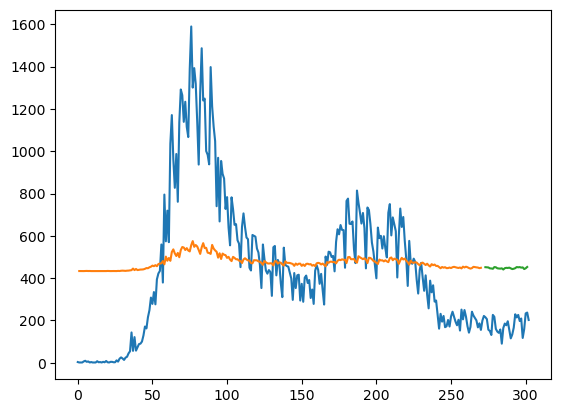

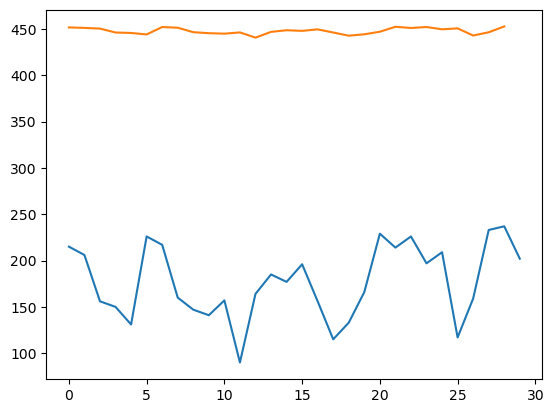

In [4]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    GRU(128, return_sequences=True, input_shape=(1, look_back)),
    Dense(1, activation='sigmoid')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="hualien_gru_5000_2.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=5000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('hualien_gru_5000_2.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict=trainPredict.reshape(-1, 1)
testPredict=testPredict.reshape(-1, 1)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('hualien_gru_5000_plot_2.png') 
plt.show()

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("hualien_gru_5000_predict&real_2.png")
plt.show()

### Model3

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1, 64)             12864     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 37,889
Trainable params: 37,889
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5000
24/24 [==============================] - 6s 43ms/step - loss: 0.0526 - mse: 0.0526 - val_loss: 0.0305 - val_mse: 0.0305
Epoch 2/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0516 - mse: 0.0516 - val_loss: 0.0293 - val_mse: 0.0293
Epoch 3/5000
24/24 [==============================

24/24 [==============================] - 0s 11ms/step - loss: 0.0383 - mse: 0.0383 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 57/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0383 - mse: 0.0383 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 58/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0383 - mse: 0.0383 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 59/5000
24/24 [==============================] - 0s 16ms/step - loss: 0.0383 - mse: 0.0383 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 60/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0382 - mse: 0.0382 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 61/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0382 - mse: 0.0382 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 62/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0382 - mse: 0.0382 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 63/5000
24/24 [==============================] - 0s 14ms/step - loss: 

24/24 [==============================] - 0s 12ms/step - loss: 0.0378 - mse: 0.0378 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 118/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0378 - mse: 0.0378 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 119/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0377 - mse: 0.0377 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 120/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0377 - mse: 0.0377 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 121/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0377 - mse: 0.0377 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 122/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0377 - mse: 0.0377 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 123/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0377 - mse: 0.0377 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 124/5000
24/24 [==============================] - 0s 8ms/step - los

24/24 [==============================] - 0s 9ms/step - loss: 0.0374 - mse: 0.0374 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 179/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0374 - mse: 0.0374 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 180/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0374 - mse: 0.0374 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 181/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0374 - mse: 0.0374 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 182/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0374 - mse: 0.0374 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 183/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0374 - mse: 0.0374 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 184/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0374 - mse: 0.0374 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 185/5000
24/24 [==============================] - 0s 8ms/step - loss: 

24/24 [==============================] - 0s 9ms/step - loss: 0.0371 - mse: 0.0371 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 240/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0370 - mse: 0.0370 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 241/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0370 - mse: 0.0370 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 242/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0370 - mse: 0.0370 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 243/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0370 - mse: 0.0370 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 244/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0370 - mse: 0.0370 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 245/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0370 - mse: 0.0370 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 246/5000
24/24 [==============================] - 0s 8ms/step - los

24/24 [==============================] - 0s 9ms/step - loss: 0.0366 - mse: 0.0366 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 301/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0366 - mse: 0.0366 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 302/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0366 - mse: 0.0366 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 303/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0366 - mse: 0.0366 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 304/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0366 - mse: 0.0366 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 305/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0366 - mse: 0.0366 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 306/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0366 - mse: 0.0366 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 307/5000
24/24 [==============================] - 0s 8ms/step - loss: 

24/24 [==============================] - 0s 8ms/step - loss: 0.0362 - mse: 0.0362 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 362/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0362 - mse: 0.0362 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 363/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0362 - mse: 0.0362 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 364/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0362 - mse: 0.0362 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 365/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0362 - mse: 0.0362 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 366/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0362 - mse: 0.0362 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 367/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0361 - mse: 0.0361 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 368/5000
24/24 [==============================] - 0s 8ms/step - loss:

24/24 [==============================] - 0s 8ms/step - loss: 0.0357 - mse: 0.0357 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 423/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0357 - mse: 0.0357 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 424/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0357 - mse: 0.0357 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 425/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0357 - mse: 0.0357 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 426/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0357 - mse: 0.0357 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 427/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0357 - mse: 0.0357 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 428/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0357 - mse: 0.0357 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 429/5000
24/24 [==============================] - 0s 8ms/step - loss: 

24/24 [==============================] - 0s 8ms/step - loss: 0.0352 - mse: 0.0352 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 484/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0352 - mse: 0.0352 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 485/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0352 - mse: 0.0352 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 486/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0352 - mse: 0.0352 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 487/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0351 - mse: 0.0351 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 488/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0351 - mse: 0.0351 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 489/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0351 - mse: 0.0351 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 490/5000
24/24 [==============================] - 0s 9ms/step - loss

24/24 [==============================] - 0s 8ms/step - loss: 0.0346 - mse: 0.0346 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 545/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0346 - mse: 0.0346 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 546/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 547/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 548/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 549/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 550/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 551/5000
24/24 [==============================] - 0s 8ms/step - loss:

24/24 [==============================] - 0s 8ms/step - loss: 0.0339 - mse: 0.0339 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 606/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0339 - mse: 0.0339 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 607/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0339 - mse: 0.0339 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 608/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0338 - mse: 0.0338 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 609/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0338 - mse: 0.0338 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 610/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0338 - mse: 0.0338 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 611/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0338 - mse: 0.0338 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 612/5000
24/24 [==============================] - 0s 9ms/step - loss: 0

24/24 [==============================] - 0s 8ms/step - loss: 0.0331 - mse: 0.0331 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 667/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0331 - mse: 0.0331 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 668/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0331 - mse: 0.0331 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 669/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0331 - mse: 0.0331 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 670/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0331 - mse: 0.0331 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 671/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0331 - mse: 0.0331 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 672/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0330 - mse: 0.0330 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 673/5000
24/24 [==============================] - 0s 8ms/step - los

24/24 [==============================] - 0s 11ms/step - loss: 0.0323 - mse: 0.0323 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 728/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0323 - mse: 0.0323 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 729/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0323 - mse: 0.0323 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 730/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0323 - mse: 0.0323 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 731/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0322 - mse: 0.0322 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 732/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0322 - mse: 0.0322 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 733/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0322 - mse: 0.0322 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 734/5000
24/24 [==============================] - 0s 13ms/step - lo

24/24 [==============================] - 0s 9ms/step - loss: 0.0314 - mse: 0.0314 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 789/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0314 - mse: 0.0314 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 790/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0314 - mse: 0.0314 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 791/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0314 - mse: 0.0314 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 792/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0314 - mse: 0.0314 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 793/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0313 - mse: 0.0313 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 794/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0313 - mse: 0.0313 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 795/5000
24/24 [==============================] - 0s 8ms/step - los

24/24 [==============================] - 0s 8ms/step - loss: 0.0305 - mse: 0.0305 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 850/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0304 - mse: 0.0304 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 851/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0304 - mse: 0.0304 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 852/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0304 - mse: 0.0304 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 853/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0304 - mse: 0.0304 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 854/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0304 - mse: 0.0304 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 855/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0304 - mse: 0.0304 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 856/5000
24/24 [==============================] - 0s 9ms/step - loss:

24/24 [==============================] - 0s 8ms/step - loss: 0.0295 - mse: 0.0295 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 911/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0294 - mse: 0.0294 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 912/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0294 - mse: 0.0294 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 913/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0294 - mse: 0.0294 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 914/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0294 - mse: 0.0294 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 915/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0294 - mse: 0.0294 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 916/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0294 - mse: 0.0294 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 917/5000
24/24 [==============================] - 0s 8ms/step - loss:

24/24 [==============================] - 0s 15ms/step - loss: 0.0284 - mse: 0.0284 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 972/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0284 - mse: 0.0284 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 973/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0284 - mse: 0.0284 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 974/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0284 - mse: 0.0284 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 975/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0284 - mse: 0.0284 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 976/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0284 - mse: 0.0284 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 977/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0283 - mse: 0.0283 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 978/5000
24/24 [==============================] - 0s 8ms/step - loss:

Epoch 1032/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0274 - mse: 0.0274 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 1033/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0274 - mse: 0.0274 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 1034/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0274 - mse: 0.0274 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 1035/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0274 - mse: 0.0274 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 1036/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0274 - mse: 0.0274 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 1037/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 1038/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 1039/5000
24/24 [=============================

24/24 [==============================] - 0s 8ms/step - loss: 0.0265 - mse: 0.0265 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 1093/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0264 - mse: 0.0264 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 1094/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0264 - mse: 0.0264 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 1095/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0264 - mse: 0.0264 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 1096/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0264 - mse: 0.0264 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 1097/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0264 - mse: 0.0264 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 1098/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0264 - mse: 0.0264 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 1099/5000
24/24 [==============================] - 0s 8ms/step -

24/24 [==============================] - 0s 8ms/step - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 1153/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 1154/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 1155/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 1156/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 1157/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 1158/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 1159/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 1213/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 1214/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 1215/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 1216/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 1217/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 1218/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 1219/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 1220/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 1274/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 1275/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 1276/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 1277/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 1278/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 1279/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 1280/5000
24/24 [==============================] - 0s 8ms/step - 

24/24 [==============================] - 0s 11ms/step - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 1334/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 1335/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 1336/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 1337/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 1338/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 1339/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 1340/5000
24/24 [==============================] - 0s 8ms/step -

Epoch 1394/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 1395/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 1396/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 1397/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 1398/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 1399/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 1400/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 1401/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 1455/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 1456/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 1457/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 1458/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 1459/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 1460/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 1461/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 1515/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 1516/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 1517/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 1518/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 1519/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 1520/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 1521/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 1522/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 1576/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 1577/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 1578/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 1579/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 1580/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 1581/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 1582/5000
24/24 [==============================] - 0s 7ms/step - 

Epoch 1636/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0220 - mse: 0.0220 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 1637/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 1638/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 1639/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 1640/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 1641/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 1642/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 1643/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 1697/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 1698/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 1699/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 1700/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 1701/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 1702/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 1703/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 1757/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0217 - mse: 0.0217 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 1758/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0217 - mse: 0.0217 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 1759/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0217 - mse: 0.0217 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 1760/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0217 - mse: 0.0217 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 1761/5000
24/24 [==============================] - 0s 16ms/step - loss: 0.0217 - mse: 0.0217 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 1762/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0217 - mse: 0.0217 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 1763/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0217 - mse: 0.0217 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 1764/5000
24/24 [==============================

24/24 [==============================] - 0s 9ms/step - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 1818/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 1819/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 1820/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 1821/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 1822/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 1823/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 1824/5000
24/24 [==============================] - 0s 9ms/step 

Epoch 1878/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 1879/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 1880/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 1881/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 1882/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 1883/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 1884/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 1885/5000
24/24 [==============================] 

24/24 [==============================] - 0s 9ms/step - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 1939/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 1940/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 1941/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 1942/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 1943/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 1944/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 1945/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 1999/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0214 - mse: 0.0214 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 2000/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0214 - mse: 0.0214 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 2001/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0214 - mse: 0.0214 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 2002/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0214 - mse: 0.0214 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 2003/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0214 - mse: 0.0214 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 2004/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0214 - mse: 0.0214 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 2005/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0214 - mse: 0.0214 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 2006/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0213 - mse: 0.0213 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 2060/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0213 - mse: 0.0213 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 2061/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0213 - mse: 0.0213 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 2062/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0213 - mse: 0.0213 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 2063/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0213 - mse: 0.0213 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 2064/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0213 - mse: 0.0213 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 2065/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0213 - mse: 0.0213 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 2066/5000
24/24 [==============================] - 0s 9ms/step - 

Epoch 2120/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 2121/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 2122/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 2123/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 2124/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 2125/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 2126/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 2127/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 2181/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 2182/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 2183/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 2184/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 2185/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 2186/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 2187/5000
24/24 [==============================] - 0s 7ms/step - 

Epoch 2241/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 2242/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 2243/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 2244/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 2245/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 2246/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 2247/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 2248/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 2302/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2303/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2304/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2305/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 2306/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2307/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2308/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 2362/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2363/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2364/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2365/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2366/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2367/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2368/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2369/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2423/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2424/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2425/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2426/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2427/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2428/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2429/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 2483/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0205 - mse: 0.0205 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2484/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0205 - mse: 0.0205 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2485/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0205 - mse: 0.0205 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2486/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0205 - mse: 0.0205 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2487/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0205 - mse: 0.0205 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2488/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0205 - mse: 0.0205 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2489/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0205 - mse: 0.0205 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2490/5000
24/24 [==============================] 

24/24 [==============================] - 0s 9ms/step - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 2544/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 2545/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 2546/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 2547/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 2548/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 2549/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 2550/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 2604/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 2605/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 2606/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 2607/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 2608/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 2609/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 2610/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 2611/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 2665/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 2666/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 2667/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 2668/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 2669/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 2670/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 2671/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 2725/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 2726/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 2727/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 2728/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 2729/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 2730/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 2731/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 2732/5000
24/24 [==============================] 

24/24 [==============================] - 0s 7ms/step - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 2786/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 2787/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 2788/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 2789/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 2790/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 2791/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 2792/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 2846/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 2847/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 2848/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 2849/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 2850/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 2851/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 2852/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 2853/5000
24/24 [==============================] 

24/24 [==============================] - 0s 12ms/step - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 2907/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 2908/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 2909/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 2910/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 2911/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 2912/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 2913/5000
24/24 [==============================] - 0s 10ms/step

Epoch 2967/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 2968/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 2969/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 2970/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 2971/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 2972/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 2973/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 2974/5000
24/24 [==============================]

24/24 [==============================] - 0s 8ms/step - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 3028/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 3029/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 3030/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 3031/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 3032/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 3033/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 3034/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 3088/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 3089/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 3090/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 3091/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 3092/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 3093/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 3094/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 3095/5000
24/24 [==============================] 

24/24 [==============================] - 0s 9ms/step - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 3149/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 3150/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 3151/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 3152/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 3153/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 3154/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 3155/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 3209/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 3210/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 3211/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 3212/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 3213/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 3214/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 3215/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 3216/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 3270/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 3271/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 3272/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 3273/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 3274/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 3275/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 3276/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 3330/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 3331/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 3332/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 3333/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 3334/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 3335/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 3336/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 3337/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 3391/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 3392/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 3393/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 3394/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 3395/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 3396/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 3397/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 3451/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 3452/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 3453/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 3454/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 3455/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 3456/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 3457/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 3458/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 3512/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 3513/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 3514/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 3515/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 3516/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 3517/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 3518/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 3572/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 3573/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 3574/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 3575/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 3576/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 3577/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 3578/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 3579/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 3633/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 3634/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 3635/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 3636/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 3637/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 3638/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 3639/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 3693/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 3694/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 3695/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 3696/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 3697/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 3698/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 3699/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 3700/5000
24/24 [==============================] 

24/24 [==============================] - 0s 9ms/step - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 3754/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 3755/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 3756/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 3757/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 3758/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 3759/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 3760/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 3814/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 3815/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 3816/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 3817/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 3818/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 3819/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 3820/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 3821/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 3875/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 3876/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 3877/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 3878/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 3879/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 3880/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 3881/5000
24/24 [==============================] - 0s 7ms/step - 

Epoch 3935/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 3936/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 3937/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 3938/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 3939/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 3940/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 3941/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 3942/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 3996/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 3997/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 3998/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 3999/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 4000/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 4001/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 4002/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 4056/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 4057/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 4058/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 4059/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 4060/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 4061/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4062/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4063/5000
24/24 [==============================] 

24/24 [==============================] - 0s 7ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4117/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4118/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4119/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4120/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4121/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4122/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4123/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 4177/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4178/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4179/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4180/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4181/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4182/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4183/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4184/5000
24/24 [==============================] 

24/24 [==============================] - 0s 7ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4238/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4239/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4240/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4241/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4242/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 4243/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4244/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 4298/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4299/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4300/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4301/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4302/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 4303/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4304/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4305/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4359/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4360/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4361/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4362/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4363/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4364/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4365/5000
24/24 [==============================] - 0s 8ms/step -

Epoch 4419/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4420/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4421/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4422/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4423/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4424/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4425/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4426/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4480/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4481/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4482/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4483/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4484/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4485/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4486/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 4540/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4541/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4542/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4543/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4544/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4545/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4546/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4547/5000
24/24 [==============================] 

24/24 [==============================] - 0s 9ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4601/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4602/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4603/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4604/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4605/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4606/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4607/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 4661/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4662/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4663/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4664/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4665/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4666/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4667/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4668/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4722/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4723/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 4724/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4725/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 4726/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4727/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 4728/5000
24/24 [==============================] - 0s 7ms/step - 

Epoch 4782/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4783/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 4784/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4785/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4786/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 4787/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 4788/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 4789/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 4843/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 4844/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 4845/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 4846/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 4847/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4848/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 4849/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 4903/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 4904/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 4905/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 4906/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 4907/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 4908/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 4909/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 4910/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 4964/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 4965/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 4966/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4967/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 4968/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 4969/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 4970/5000
24/24 [==============================] - 0s 8ms/step - 

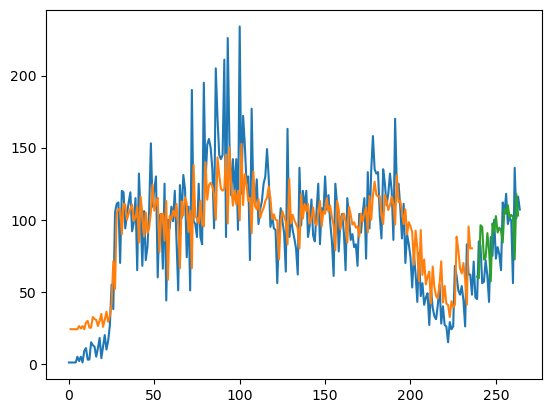

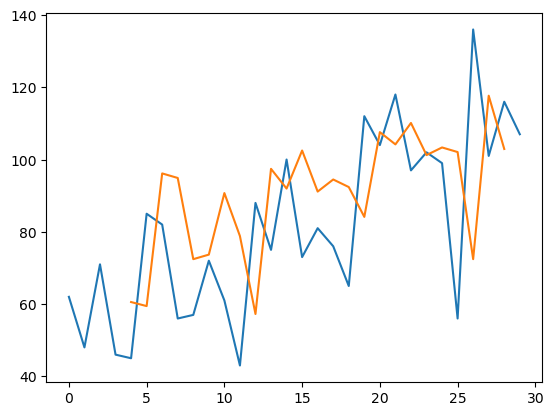

In [3]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    GRU(64, return_sequences=True, input_shape=(1, look_back)),
    GRU(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="kinmen_gru_5000_3.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=5000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('kinmen_gru_5000_3.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('kinmen_gru_5000_plot_3.png') 
plt.show()

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("kinmen_gru_5000_predict&real_3.png")
plt.show()

### Model4

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 1, 64)             12864     
                                                                 
 dense_1 (Dense)             (None, 1, 4)              260       
                                                                 
 gru_3 (GRU)                 (None, 64)                13440     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 26,629
Trainable params: 26,629
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5000
24/24 [==============================] - 6s 52ms/step - loss: 0.0601 - mse: 0.0601 - val_loss: 0.0368 - val_mse: 0.0368
Epoch 2/5000
24/24 [=============================

24/24 [==============================] - 0s 8ms/step - loss: 0.0387 - mse: 0.0387 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 56/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0387 - mse: 0.0387 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 57/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0387 - mse: 0.0387 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 58/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0387 - mse: 0.0387 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 59/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0387 - mse: 0.0387 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 60/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0387 - mse: 0.0387 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 61/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0387 - mse: 0.0387 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 62/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0387 

24/24 [==============================] - 0s 8ms/step - loss: 0.0387 - mse: 0.0387 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 117/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0387 - mse: 0.0387 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 118/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0387 - mse: 0.0387 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 119/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0387 - mse: 0.0387 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 120/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0387 - mse: 0.0387 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 121/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0387 - mse: 0.0387 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 122/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0387 - mse: 0.0387 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 123/5000
24/24 [==============================] - 0s 9ms/step - loss: 0

24/24 [==============================] - 0s 9ms/step - loss: 0.0387 - mse: 0.0387 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 178/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 179/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0387 - mse: 0.0387 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 180/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0387 - mse: 0.0387 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 181/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0387 - mse: 0.0387 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 182/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0387 - mse: 0.0387 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 183/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0387 - mse: 0.0387 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 184/5000
24/24 [==============================] - 0s 9ms/step - loss: 0

24/24 [==============================] - 0s 9ms/step - loss: 0.0387 - mse: 0.0387 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 239/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0387 - mse: 0.0387 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 240/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 241/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 242/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 243/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0387 - mse: 0.0387 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 244/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0387 - mse: 0.0387 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 245/5000
24/24 [==============================] - 0s 9ms/step - loss: 0

24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 300/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 301/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 302/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0387 - mse: 0.0387 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 303/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 304/5000
24/24 [==============================] - 0s 17ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 305/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 306/5000
24/24 [==============================] - 0s 10ms/step - los

24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 361/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 362/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0387 - mse: 0.0387 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 363/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 364/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 365/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 366/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 367/5000
24/24 [==============================] - 0s 8ms/step - loss: 0

24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 422/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 423/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 424/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 425/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 426/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 427/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 428/5000
24/24 [==============================] - 0s 8ms/step - loss: 0

24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 483/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 484/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 485/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 486/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 487/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 488/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 489/5000
24/24 [==============================] - 0s 8ms/step - loss: 0

24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 544/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 545/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 546/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 547/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 548/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 549/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 550/5000
24/24 [==============================] - 0s 8ms/step - loss: 0

24/24 [==============================] - 0s 9ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 605/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 606/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 607/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 608/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 609/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 610/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 611/5000
24/24 [==============================] - 0s 9ms/step - loss: 

24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 666/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 667/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 668/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 669/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 670/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 671/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 672/5000
24/24 [==============================] - 0s 8ms/step - loss: 0

24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 727/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 728/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 729/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 730/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 731/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 732/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 733/5000
24/24 [==============================] - 0s 8ms/step - loss: 0

24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 788/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 789/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 790/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 791/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 792/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 793/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 794/5000
24/24 [==============================] - 0s 8ms/step - loss: 0

24/24 [==============================] - 0s 9ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 849/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 850/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 851/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 852/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 853/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 854/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 855/5000
24/24 [==============================] - 0s 8ms/step - loss: 0

24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 910/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 911/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 912/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 913/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 914/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 915/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 916/5000
24/24 [==============================] - 0s 8ms/step - loss: 0

24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 971/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 972/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 973/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 974/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 975/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 976/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 977/5000
24/24 [==============================] - 0s 8ms/step - loss: 0

24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1032/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1033/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1034/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1035/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1036/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1037/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1038/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 1092/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1093/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1094/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1095/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1096/5000
24/24 [==============================] - 1s 20ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1097/5000
24/24 [==============================] - 1s 23ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1098/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1099/5000
24/24 [=============================

24/24 [==============================] - 0s 9ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1153/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1154/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1155/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1156/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1157/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1158/5000
24/24 [==============================] - 0s 17ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1159/5000
24/24 [==============================] - 1s 47ms/step 

24/24 [==============================] - 0s 10ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1213/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1214/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1215/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1216/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1217/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1218/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1219/5000
24/24 [==============================] - 0s 9ms/step

Epoch 1273/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1274/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1275/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1276/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1277/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1278/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1279/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1280/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1334/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1335/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1336/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1337/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1338/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1339/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1340/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 1394/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1395/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1396/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1397/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1398/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1399/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1400/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1401/5000
24/24 [==============================]

24/24 [==============================] - 0s 9ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1455/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1456/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1457/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1458/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1459/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1460/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1461/5000
24/24 [==============================] - 0s 11ms/step -

Epoch 1515/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1516/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1517/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1518/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1519/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1520/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1521/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1522/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1576/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1577/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1578/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1579/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1580/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1581/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1582/5000
24/24 [==============================] - 0s 9ms/step - 

Epoch 1636/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1637/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1638/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1639/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1640/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1641/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1642/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1643/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1697/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1698/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1699/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1700/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1701/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1702/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1703/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 1757/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1758/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1759/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1760/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1761/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1762/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1763/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1764/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1818/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1819/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1820/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1821/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1822/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1823/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1824/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 1878/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1879/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1880/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1881/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1882/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1883/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1884/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1885/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1939/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1940/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1941/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1942/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1943/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1944/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1945/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 1999/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2000/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2001/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 2002/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2003/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2004/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2005/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 2006/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0383 - mse: 0.0383 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2060/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0383 - mse: 0.0383 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2061/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0383 - mse: 0.0383 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2062/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0383 - mse: 0.0383 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2063/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0383 - mse: 0.0383 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 2064/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0383 - mse: 0.0383 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2065/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0383 - mse: 0.0383 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2066/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 2120/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0383 - mse: 0.0383 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2121/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0383 - mse: 0.0383 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2122/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0383 - mse: 0.0383 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2123/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0383 - mse: 0.0383 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2124/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0383 - mse: 0.0383 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2125/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0383 - mse: 0.0383 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2126/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0383 - mse: 0.0383 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2127/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0383 - mse: 0.0383 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2181/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0383 - mse: 0.0383 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2182/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0383 - mse: 0.0383 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2183/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0383 - mse: 0.0383 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2184/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0383 - mse: 0.0383 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2185/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0383 - mse: 0.0383 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2186/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0383 - mse: 0.0383 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2187/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 2241/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0382 - mse: 0.0382 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2242/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0382 - mse: 0.0382 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2243/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0383 - mse: 0.0383 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2244/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0382 - mse: 0.0382 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2245/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0382 - mse: 0.0382 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2246/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0382 - mse: 0.0382 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2247/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0382 - mse: 0.0382 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2248/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0382 - mse: 0.0382 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2302/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0382 - mse: 0.0382 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2303/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0382 - mse: 0.0382 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2304/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0382 - mse: 0.0382 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2305/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0382 - mse: 0.0382 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2306/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0382 - mse: 0.0382 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2307/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0382 - mse: 0.0382 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2308/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 2362/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0382 - mse: 0.0382 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2363/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0382 - mse: 0.0382 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2364/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0382 - mse: 0.0382 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2365/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0382 - mse: 0.0382 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2366/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0382 - mse: 0.0382 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2367/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0382 - mse: 0.0382 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2368/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0382 - mse: 0.0382 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2369/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0381 - mse: 0.0381 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2423/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0381 - mse: 0.0381 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2424/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0381 - mse: 0.0381 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2425/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0381 - mse: 0.0381 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2426/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0381 - mse: 0.0381 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2427/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0381 - mse: 0.0381 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2428/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0381 - mse: 0.0381 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2429/5000
24/24 [==============================] - 0s 9ms/step - 

Epoch 2483/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0381 - mse: 0.0381 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2484/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0381 - mse: 0.0381 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2485/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0381 - mse: 0.0381 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2486/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0381 - mse: 0.0381 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2487/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0381 - mse: 0.0381 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2488/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0381 - mse: 0.0381 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2489/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0381 - mse: 0.0381 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2490/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0380 - mse: 0.0380 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2544/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0380 - mse: 0.0380 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2545/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0380 - mse: 0.0380 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2546/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0380 - mse: 0.0380 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2547/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0380 - mse: 0.0380 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2548/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0380 - mse: 0.0380 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2549/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0380 - mse: 0.0380 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2550/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 2604/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0380 - mse: 0.0380 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2605/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0380 - mse: 0.0380 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2606/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0380 - mse: 0.0380 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2607/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0380 - mse: 0.0380 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2608/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0380 - mse: 0.0380 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2609/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0380 - mse: 0.0380 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2610/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0380 - mse: 0.0380 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2611/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0379 - mse: 0.0379 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2665/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0379 - mse: 0.0379 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2666/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0379 - mse: 0.0379 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2667/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0379 - mse: 0.0379 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2668/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0379 - mse: 0.0379 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2669/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0379 - mse: 0.0379 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2670/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0379 - mse: 0.0379 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2671/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 2725/5000
24/24 [==============================] - 1s 22ms/step - loss: 0.0379 - mse: 0.0379 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2726/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0378 - mse: 0.0378 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2727/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0379 - mse: 0.0379 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2728/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0378 - mse: 0.0378 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2729/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0378 - mse: 0.0378 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2730/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0378 - mse: 0.0378 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2731/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0379 - mse: 0.0379 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2732/5000
24/24 [==============================

24/24 [==============================] - 0s 8ms/step - loss: 0.0378 - mse: 0.0378 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2786/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0378 - mse: 0.0378 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2787/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0378 - mse: 0.0378 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2788/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0378 - mse: 0.0378 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2789/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0378 - mse: 0.0378 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2790/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0378 - mse: 0.0378 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2791/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0378 - mse: 0.0378 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2792/5000
24/24 [==============================] - 0s 9ms/step - 

Epoch 2846/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0377 - mse: 0.0377 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2847/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0377 - mse: 0.0377 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2848/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0377 - mse: 0.0377 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2849/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0377 - mse: 0.0377 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2850/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0377 - mse: 0.0377 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2851/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0377 - mse: 0.0377 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2852/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0377 - mse: 0.0377 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2853/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0376 - mse: 0.0376 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2907/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0376 - mse: 0.0376 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2908/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0376 - mse: 0.0376 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2909/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0376 - mse: 0.0376 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2910/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0376 - mse: 0.0376 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2911/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0376 - mse: 0.0376 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2912/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0376 - mse: 0.0376 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2913/5000
24/24 [==============================] - 0s 9ms/step - 

Epoch 2967/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0375 - mse: 0.0375 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2968/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0375 - mse: 0.0375 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2969/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0375 - mse: 0.0375 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2970/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0375 - mse: 0.0375 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2971/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0375 - mse: 0.0375 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2972/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0375 - mse: 0.0375 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2973/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0375 - mse: 0.0375 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2974/5000
24/24 [==============================] 

24/24 [==============================] - 0s 9ms/step - loss: 0.0374 - mse: 0.0374 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 3028/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0374 - mse: 0.0374 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 3029/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0374 - mse: 0.0374 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 3030/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0374 - mse: 0.0374 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 3031/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0374 - mse: 0.0374 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 3032/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0374 - mse: 0.0374 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 3033/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0374 - mse: 0.0374 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 3034/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 3088/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0373 - mse: 0.0373 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 3089/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0373 - mse: 0.0373 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 3090/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0373 - mse: 0.0373 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 3091/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0373 - mse: 0.0373 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 3092/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0373 - mse: 0.0373 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 3093/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0373 - mse: 0.0373 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 3094/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0373 - mse: 0.0373 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 3095/5000
24/24 [==============================]

24/24 [==============================] - 0s 8ms/step - loss: 0.0371 - mse: 0.0371 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 3149/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0371 - mse: 0.0371 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 3150/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0371 - mse: 0.0371 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 3151/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0371 - mse: 0.0371 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 3152/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0371 - mse: 0.0371 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 3153/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0371 - mse: 0.0371 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 3154/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0371 - mse: 0.0371 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 3155/5000
24/24 [==============================] - 0s 10ms/step -

Epoch 3209/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0370 - mse: 0.0370 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 3210/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0370 - mse: 0.0370 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 3211/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0370 - mse: 0.0370 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 3212/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0370 - mse: 0.0370 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 3213/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0370 - mse: 0.0370 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 3214/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0370 - mse: 0.0370 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 3215/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0370 - mse: 0.0370 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 3216/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0368 - mse: 0.0368 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 3270/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0368 - mse: 0.0368 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 3271/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0368 - mse: 0.0368 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 3272/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0368 - mse: 0.0368 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 3273/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0368 - mse: 0.0368 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 3274/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0368 - mse: 0.0368 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 3275/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0368 - mse: 0.0368 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 3276/5000
24/24 [==============================] - 0s 9ms/step - 

Epoch 3330/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0366 - mse: 0.0366 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 3331/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0366 - mse: 0.0366 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 3332/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0366 - mse: 0.0366 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 3333/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0366 - mse: 0.0366 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 3334/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0366 - mse: 0.0366 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 3335/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0366 - mse: 0.0366 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 3336/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0366 - mse: 0.0366 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 3337/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0364 - mse: 0.0364 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 3391/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0364 - mse: 0.0364 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 3392/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0364 - mse: 0.0364 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 3393/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0364 - mse: 0.0364 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 3394/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0364 - mse: 0.0364 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 3395/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0364 - mse: 0.0364 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 3396/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0364 - mse: 0.0364 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 3397/5000
24/24 [==============================] - 0s 8ms/step -

Epoch 3451/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0362 - mse: 0.0362 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 3452/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0362 - mse: 0.0362 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 3453/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0362 - mse: 0.0362 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 3454/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0362 - mse: 0.0362 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 3455/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0362 - mse: 0.0362 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 3456/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0362 - mse: 0.0362 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 3457/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0362 - mse: 0.0362 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 3458/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0359 - mse: 0.0359 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 3512/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0359 - mse: 0.0359 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 3513/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0359 - mse: 0.0359 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 3514/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0359 - mse: 0.0359 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 3515/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0359 - mse: 0.0359 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 3516/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0359 - mse: 0.0359 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 3517/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0359 - mse: 0.0359 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 3518/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 3572/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0356 - mse: 0.0356 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 3573/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0357 - mse: 0.0357 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 3574/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0356 - mse: 0.0356 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 3575/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0356 - mse: 0.0356 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 3576/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0356 - mse: 0.0356 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 3577/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0356 - mse: 0.0356 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 3578/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0356 - mse: 0.0356 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 3579/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0353 - mse: 0.0353 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 3633/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0353 - mse: 0.0353 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 3634/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0353 - mse: 0.0353 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 3635/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0353 - mse: 0.0353 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 3636/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0353 - mse: 0.0353 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 3637/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0353 - mse: 0.0353 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 3638/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0353 - mse: 0.0353 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 3639/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 3693/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0349 - mse: 0.0349 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 3694/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0349 - mse: 0.0349 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 3695/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0349 - mse: 0.0349 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 3696/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0349 - mse: 0.0349 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 3697/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0349 - mse: 0.0349 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 3698/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0349 - mse: 0.0349 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 3699/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0349 - mse: 0.0349 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 3700/5000
24/24 [==============================]

24/24 [==============================] - 0s 9ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 3754/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 3755/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 3756/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 3757/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 3758/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 3759/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 3760/5000
24/24 [==============================] - 0s 10ms/step -

Epoch 3814/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0340 - mse: 0.0340 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 3815/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0340 - mse: 0.0340 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 3816/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0340 - mse: 0.0340 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 3817/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0340 - mse: 0.0340 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 3818/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0340 - mse: 0.0340 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 3819/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0340 - mse: 0.0340 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 3820/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0340 - mse: 0.0340 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 3821/5000
24/24 [==============================]

24/24 [==============================] - 0s 16ms/step - loss: 0.0335 - mse: 0.0335 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 3875/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0335 - mse: 0.0335 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 3876/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0335 - mse: 0.0335 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 3877/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0335 - mse: 0.0335 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 3878/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0335 - mse: 0.0335 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 3879/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0335 - mse: 0.0335 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 3880/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0334 - mse: 0.0334 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 3881/5000
24/24 [==============================] - 0s 12ms/s

Epoch 3935/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0329 - mse: 0.0329 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 3936/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0329 - mse: 0.0329 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 3937/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0329 - mse: 0.0329 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 3938/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0329 - mse: 0.0329 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 3939/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0329 - mse: 0.0329 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 3940/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0328 - mse: 0.0328 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 3941/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0328 - mse: 0.0328 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 3942/5000
24/24 [=============================

24/24 [==============================] - 0s 8ms/step - loss: 0.0322 - mse: 0.0322 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 3996/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0322 - mse: 0.0322 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 3997/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0322 - mse: 0.0322 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 3998/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0322 - mse: 0.0322 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 3999/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0322 - mse: 0.0322 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 4000/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0322 - mse: 0.0322 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 4001/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0321 - mse: 0.0321 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 4002/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 4056/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0315 - mse: 0.0315 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 4057/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0315 - mse: 0.0315 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 4058/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0314 - mse: 0.0314 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 4059/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0314 - mse: 0.0314 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 4060/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0314 - mse: 0.0314 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 4061/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0314 - mse: 0.0314 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 4062/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0314 - mse: 0.0314 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 4063/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0307 - mse: 0.0307 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 4117/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0306 - mse: 0.0306 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 4118/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0306 - mse: 0.0306 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 4119/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0306 - mse: 0.0306 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 4120/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0306 - mse: 0.0306 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 4121/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0306 - mse: 0.0306 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 4122/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0306 - mse: 0.0306 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 4123/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 4177/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0298 - mse: 0.0298 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 4178/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0298 - mse: 0.0298 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 4179/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0298 - mse: 0.0298 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 4180/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0298 - mse: 0.0298 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 4181/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0297 - mse: 0.0297 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 4182/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0297 - mse: 0.0297 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 4183/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0297 - mse: 0.0297 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 4184/5000
24/24 [==============================

24/24 [==============================] - 0s 10ms/step - loss: 0.0289 - mse: 0.0289 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 4238/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0289 - mse: 0.0289 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 4239/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0289 - mse: 0.0289 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 4240/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0289 - mse: 0.0289 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 4241/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0288 - mse: 0.0288 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 4242/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0288 - mse: 0.0288 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 4243/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0288 - mse: 0.0288 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 4244/5000
24/24 [==============================] - 0s 9ms/step

Epoch 4298/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0280 - mse: 0.0280 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 4299/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0280 - mse: 0.0280 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 4300/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0279 - mse: 0.0279 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 4301/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0279 - mse: 0.0279 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 4302/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0279 - mse: 0.0279 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 4303/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0279 - mse: 0.0279 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 4304/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0279 - mse: 0.0279 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 4305/5000
24/24 [==============================]

24/24 [==============================] - 0s 8ms/step - loss: 0.0271 - mse: 0.0271 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 4359/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0271 - mse: 0.0271 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 4360/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0270 - mse: 0.0270 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 4361/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0270 - mse: 0.0270 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 4362/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0270 - mse: 0.0270 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 4363/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0270 - mse: 0.0270 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 4364/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0270 - mse: 0.0270 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 4365/5000
24/24 [==============================] - 0s 10ms/step

Epoch 4419/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0262 - mse: 0.0262 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 4420/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0262 - mse: 0.0262 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 4421/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0262 - mse: 0.0262 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 4422/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0261 - mse: 0.0261 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 4423/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0261 - mse: 0.0261 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 4424/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0261 - mse: 0.0261 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 4425/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0261 - mse: 0.0261 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 4426/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0254 - mse: 0.0254 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 4480/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0254 - mse: 0.0254 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 4481/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0254 - mse: 0.0254 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 4482/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0253 - mse: 0.0253 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 4483/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0253 - mse: 0.0253 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 4484/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0253 - mse: 0.0253 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 4485/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0253 - mse: 0.0253 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 4486/5000
24/24 [==============================] - 0s 8ms/step -

Epoch 4540/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 4541/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 4542/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 4543/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 4544/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 4545/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 4546/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 4547/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 4601/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 4602/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 4603/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 4604/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 4605/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 4606/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 4607/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 4661/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 4662/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 4663/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 4664/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 4665/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 4666/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 4667/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 4668/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 4722/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 4723/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 4724/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 4725/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 4726/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 4727/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 4728/5000
24/24 [==============================] - 0s 9ms/step - 

Epoch 4782/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 4783/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 4784/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 4785/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 4786/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 4787/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 4788/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 4789/5000
24/24 [==============================]

24/24 [==============================] - 0s 8ms/step - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 4843/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 4844/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 4845/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 4846/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 4847/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 4848/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 4849/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 4903/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0224 - mse: 0.0224 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 4904/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0224 - mse: 0.0224 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 4905/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0224 - mse: 0.0224 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 4906/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0224 - mse: 0.0224 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 4907/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0224 - mse: 0.0224 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 4908/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0224 - mse: 0.0224 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 4909/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 4910/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 4964/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 4965/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 4966/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 4967/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 4968/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 4969/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 4970/5000
24/24 [==============================] - 0s 8ms/step - 

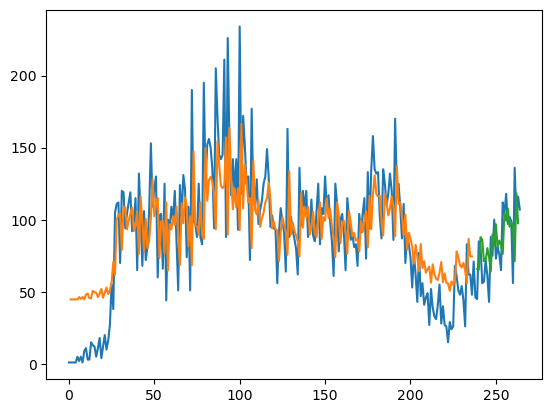

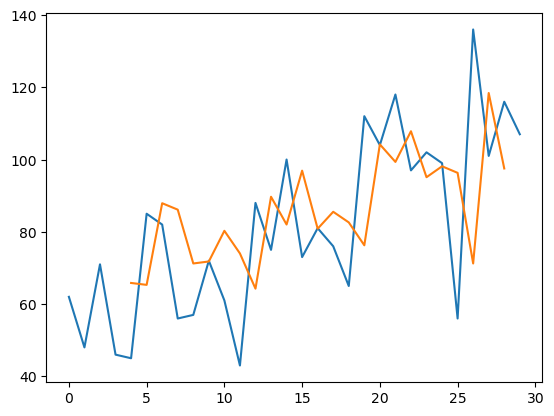

In [4]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    GRU(64, return_sequences=True, input_shape=(1, look_back)),
    Dense(4, activation='relu'),
    GRU(64, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="kinmen_gru_5000_4.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=5000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('kinmen_gru_5000_4.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('kinmen_gru_5000_plot_4.png') 
plt.show()

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("kinmen_gru_5000_predict&real_4.png")
plt.show()